## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest. (You can also check out `get_gss.ipynb` for some processed data.)
2. Write a short description of the data you chose, and why. (~500 words)
3. Load the data using Pandas. Clean them up for EDA. Do this in this notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations.
5. Describe your findings. (500 - 1000 words, or more)

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Install openpyxl for reading Excel files
%pip install openpyxl

# Read the Excel file
gss = pd.read_excel('GSS.xlsx')

# Drop the 'id_' column as it is not needed for analysis
gss = gss.drop('id_', axis=1)

gss = gss.drop('ballot', axis=1)

# Display the first few rows of the DataFrame
display(gss.head())


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


,year,wrkstat,marital,spwrksta,childs,age,educ,speduc
0,1972,Working full time,Never married,.i: Inapplicable,0,23,4 years of college,.i: Inapplicable
1,1972,Retired,Married,KEEPING HOUSE,5,70,10th grade,12th grade
2,1972,Working part time,Married,WORKING FULLTIME,4,48,12th grade,11th grade
3,1972,Working full time,Married,WORKING FULLTIME,0,27,5 years of college,8 or more years of college
4,1972,Keeping house,Married,TEMP NOT WORKING,2,61,12th grade,12th grade


In [2]:
gss.replace({'.n:  No answer': np.nan, '.s:  Skipped on Web': np.nan, '.d:  Do not Know/Cannot Choose': np.nan, '.i:  Inapplicable': np.nan}, inplace=True)

display(gss['wrkstat'].unique())
display(gss['marital'].value_counts(dropna=False))
display(gss['spwrksta'].value_counts(dropna=False))
display(gss['childs'].value_counts(dropna=False))
display(gss['age'].value_counts(dropna=False))
display(gss['educ'].value_counts(dropna=False))
display(gss['speduc'].value_counts(dropna=False))



array(['Working full time', 'Retired', 'Working part time',
       'Keeping house', 'In school',
       'Unemployed, laid off, looking for work',
       'With a job, but not at work because of temporary illness, vacation, strike',
       'Other', nan], dtype=object)

marital
Married          38959
Never married    16963
Divorced         10158
Widowed           7005
Separated         2548
NaN                 66
Name: count, dtype: int64

spwrksta
NaN                 36844
WORKING FULLTIME    20985
KEEPING HOUSE        6391
RETIRED              5337
WORKING PARTTIME     3442
UNEMPL, LAID OFF      788
TEMP NOT WORKING      760
OTHER                 741
SCHOOL                411
Name: count, dtype: int64

childs
0            20956
2            18989
1            11979
3            11671
4             5996
5             2669
6             1381
8 or more     1032
7              734
NaN            292
Name: count, dtype: int64

age
32    1625
30    1621
34    1614
28    1592
33    1584
      ... 
84     278
85     236
86     222
87     161
88     133
Name: count, Length: 73, dtype: int64

educ
12th grade                    22202
4 years of college            10666
2 years of college             8651
1 year of college              6188
11th grade                     4046
3 years of college             3484
6 years of college             3187
10th grade                     3079
8th grade                      2812
5 years of college             2571
9th grade                      2209
8 or more years of college     1941
7 years of college             1166
7th grade                       906
6th grade                       889
5th grade                       414
4th grade                       329
NaN                             286
3rd grade                       273
No formal schooling             189
2nd grade                       161
1st grade                        50
Name: count, dtype: int64

speduc
NaN                           38023
12th grade                    12595
4 years of college             5767
2 years of college             4031
1 year of college              2447
11th grade                     1713
6 years of college             1698
8th grade                      1504
10th grade                     1491
3 years of college             1312
5 years of college             1117
8 or more years of college     1010
9th grade                       907
7 years of college              555
6th grade                       447
7th grade                       430
5th grade                       195
4th grade                       142
3rd grade                       137
No formal schooling             100
2nd grade                        57
1st grade                        21
Name: count, dtype: int64

In [3]:
for col in ['wrkstat','marital','spwrksta','educ','speduc']:
    print(f"\nUnique values in {col}:")
    print(gss[col].unique())


Unique values in wrkstat:
['Working full time' 'Retired' 'Working part time' 'Keeping house'
 'In school' 'Unemployed, laid off, looking for work'
 'With a job, but not at work because of temporary illness, vacation, strike'
 'Other' nan]

Unique values in marital:
['Never married' 'Married' 'Divorced' 'Widowed' 'Separated' nan]

Unique values in spwrksta:
[nan 'KEEPING HOUSE' 'WORKING FULLTIME' 'TEMP NOT WORKING'
 'WORKING PARTTIME' 'RETIRED' 'UNEMPL, LAID OFF' 'SCHOOL' 'OTHER']

Unique values in educ:
['4 years of college' '10th grade' '12th grade' '5 years of college'
 '2 years of college' '1 year of college' '6th grade' '9th grade'
 '8th grade' '11th grade' '7th grade' '3 years of college'
 '8 or more years of college' '6 years of college' '3rd grade' '2nd grade'
 '4th grade' '5th grade' '7 years of college' '1st grade' nan
 'No formal schooling']

Unique values in speduc:
[nan '12th grade' '11th grade' '8 or more years of college' '9th grade'
 '8th grade' '2 years of college' '1 

The data set we selected comes from the General Social Survey (GSS), a bi-annual, nationally representative survey of adults in the United States. The GSS is one of the most widely used sources in the social sciences because it collects high-quality data on a broad range of topics, from family and work to politics and culture. Since it is designed to be representative of the U.S. population, the GSS allows researchers to explore patterns in American life and make meaningful generalizations. For our project, we focused on the theme of family and work dynamics, and we selected a set of variables that together provide a rich picture of these interactions.

The first variable we chose is **wrkstat**, which captures an individual’s employment status. Employment is central to understanding not only economic well-being but also identity and daily routines. Someone employed full time may face different pressures and opportunities compared to someone unemployed, retired, or working part time. By analyzing employment status, we can begin to see how work shapes individual and family roles.

We also selected **marital**, which identifies the marital status of the respondent. Marriage and partnership are critical contexts in which work and family responsibilities intersect. For example, individuals who are married or cohabiting may share resources and responsibilities differently than those who are single, divorced, or widowed. Including this variable allows us to compare how family structure influences work-related choices and pressures.

To better understand household-level dynamics, we included **spwrksta**, which records the employment status of the respondent’s spouse. This is especially important in studying modern family life, since dual-earner households have become increasingly common. Comparing single-earner and dual-earner families allows us to examine how couples balance labor inside and outside the home and how employment patterns of one partner affect the other.

Another essential variable is **childs**, which indicates how many children the respondent has. Children add both time and financial demands to a household, directly influencing decisions about employment and division of labor. For instance, families with more children may be more likely to have one parent reduce work hours or stay home altogether. This variable highlights the role of caregiving in shaping work choices.

We also selected **age**, since family and work dynamics shift over the life course. Younger adults may be focused on entering the workforce or forming families, while older adults may be preparing for retirement or adjusting to an empty nest. Age provides critical context for understanding how responsibilities and opportunities change over time.

Finally, we included **educ** and **speduc**, which measure the highest education levels of the respondent and their spouse. Education strongly predicts employment opportunities, income, and long-term stability. It also influences family patterns, such as the timing of marriage and childbearing. Including both partners’ education levels allows us to consider how socioeconomic status shapes family and work interactions.

Together, these variables provide a comprehensive view of how Americans balance work and family life. The GSS is uniquely suited for this kind of analysis because it offers reliable, representative data across individuals and households. By combining factors like employment, marital status, children, age, and education, we can tell a meaningful story about the interplay between family roles and work responsibilities in contemporary society.


3. Load the data using Pandas. Clean them up for EDA. Do this in this notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations.
5. Describe your findings. (500 - 1000 words, or more)


In [4]:
#Q3 . load data using pandas. clean them up for eda. do this in notebook with comment and markdown chunks explaining ur choices.

In [5]:
#convert numeric columns so that statistical analysis can be run and graph can be plotted
gss['childs'] = pd.to_numeric(gss['childs'], errors='coerce')
gss['age']    = pd.to_numeric(gss['age'], errors='coerce')

#clean categorical variable names (strip spaces and fix title so it won't cause errors)
for col in ['wrkstat','marital','spwrksta','educ','speduc']:
    gss[col] = gss[col].str.strip().str.title()

#check num missing variable
print(gss[['wrkstat','marital','spwrksta','childs','age','educ','speduc']].isna().sum())


wrkstat        47
marital        66
spwrksta    36844
childs       1324
age          1307
educ          286
speduc      38023
dtype: int64


In [6]:
#frequency table for categorical variable- see what value dominates each category
print(gss['wrkstat'].value_counts(dropna=False))
print(gss['marital'].value_counts(dropna=False))
print(gss['spwrksta'].value_counts(dropna=False))

#statistical description
print(gss[['childs','age']].describe())

wrkstat
Working Full Time                                                             36727
Retired                                                                       11683
Keeping House                                                                 11061
Working Part Time                                                              7750
Unemployed, Laid Off, Looking For Work                                         2796
In School                                                                      2277
Other                                                                          1740
With A Job, But Not At Work Because Of Temporary Illness, Vacation, Strike     1618
NaN                                                                              47
Name: count, dtype: int64
marital
Married          38959
Never Married    16963
Divorced         10158
Widowed           7005
Separated         2548
NaN                 66
Name: count, dtype: int64
spwrksta
NaN                 36844
Wor

In [7]:
#check that title case was fixed
for col in ['wrkstat','marital','spwrksta']:
    print(f"\n{col}:", gss[col].unique())

#confirms that all the ages make sense; no age is extreme or negative
print("Age out of range:", gss[(gss['age'] < 18) | (gss['age'] > 90)][['age']].head())
print("Children out of range:", gss[gss['childs'] > 15][['childs']].head())


wrkstat: ['Working Full Time' 'Retired' 'Working Part Time' 'Keeping House'
 'In School' 'Unemployed, Laid Off, Looking For Work'
 'With A Job, But Not At Work Because Of Temporary Illness, Vacation, Strike'
 'Other' nan]

marital: ['Never Married' 'Married' 'Divorced' 'Widowed' 'Separated' nan]

spwrksta: [nan 'Keeping House' 'Working Fulltime' 'Temp Not Working'
 'Working Parttime' 'Retired' 'Unempl, Laid Off' 'School' 'Other']
Age out of range: Empty DataFrame
Columns: [age]
Index: []
Children out of range: Empty DataFrame
Columns: [childs]
Index: []


**Q4 produce some numeric summaries and visualizations**

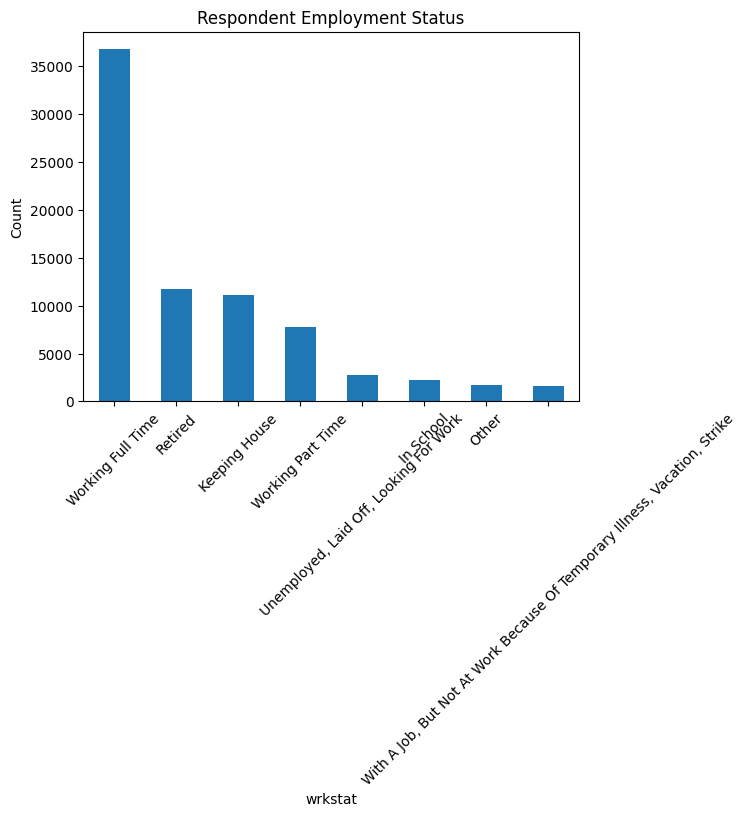

In [8]:
#employment status counts
gss['wrkstat'].value_counts().plot(kind='bar')
plt.title("Respondent Employment Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

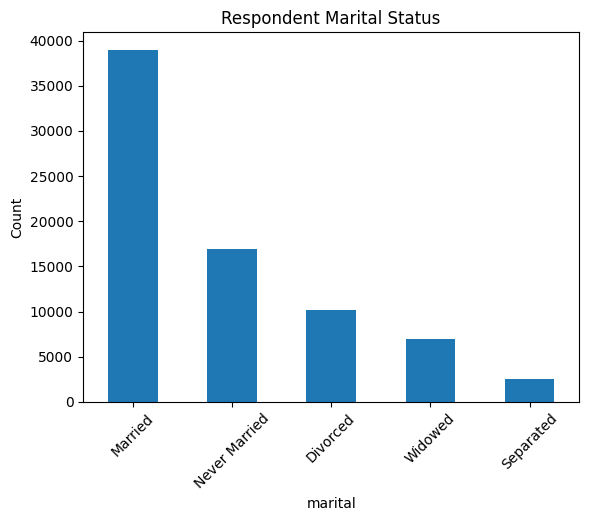

In [9]:
#marital status count
gss['marital'].value_counts().plot(kind='bar')
plt.title("Respondent Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

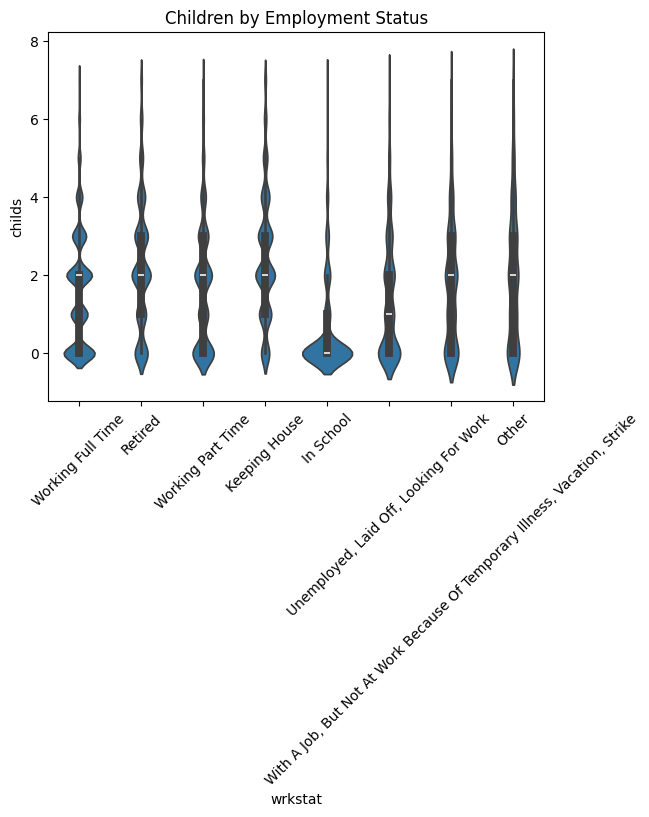

In [10]:
#relationship between work status and children- violin plot
sns.violinplot(x='wrkstat', y='childs', data=gss, inner="box")
plt.title("Children by Employment Status")
plt.xticks(rotation=45)
plt.show()

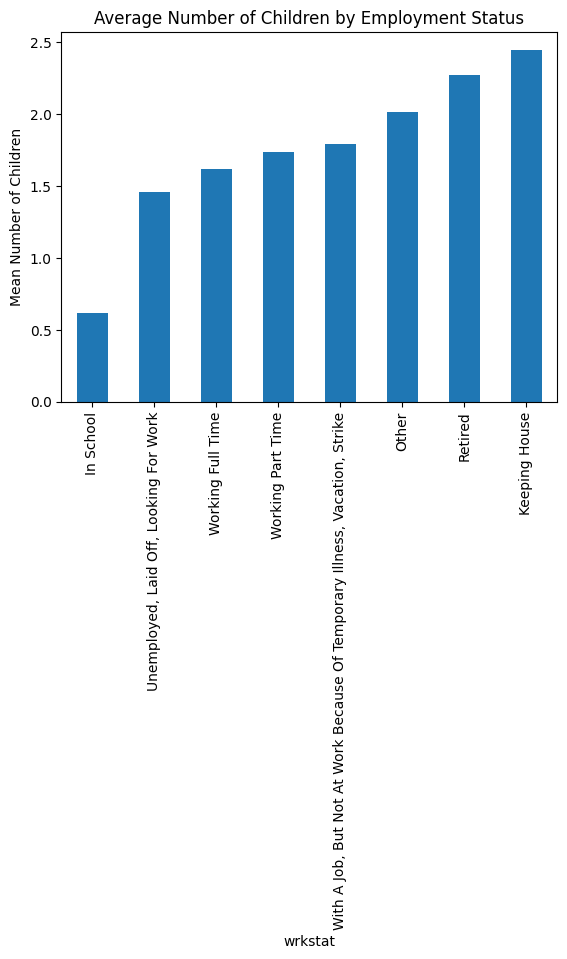

In [11]:
#mean number of children by employment status
children_by_wrkstat = gss.groupby('wrkstat')['childs'].mean().sort_values()

children_by_wrkstat.plot(kind='bar')
plt.title("Average Number of Children by Employment Status")
plt.ylabel("Mean Number of Children")
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x800 with 0 Axes>

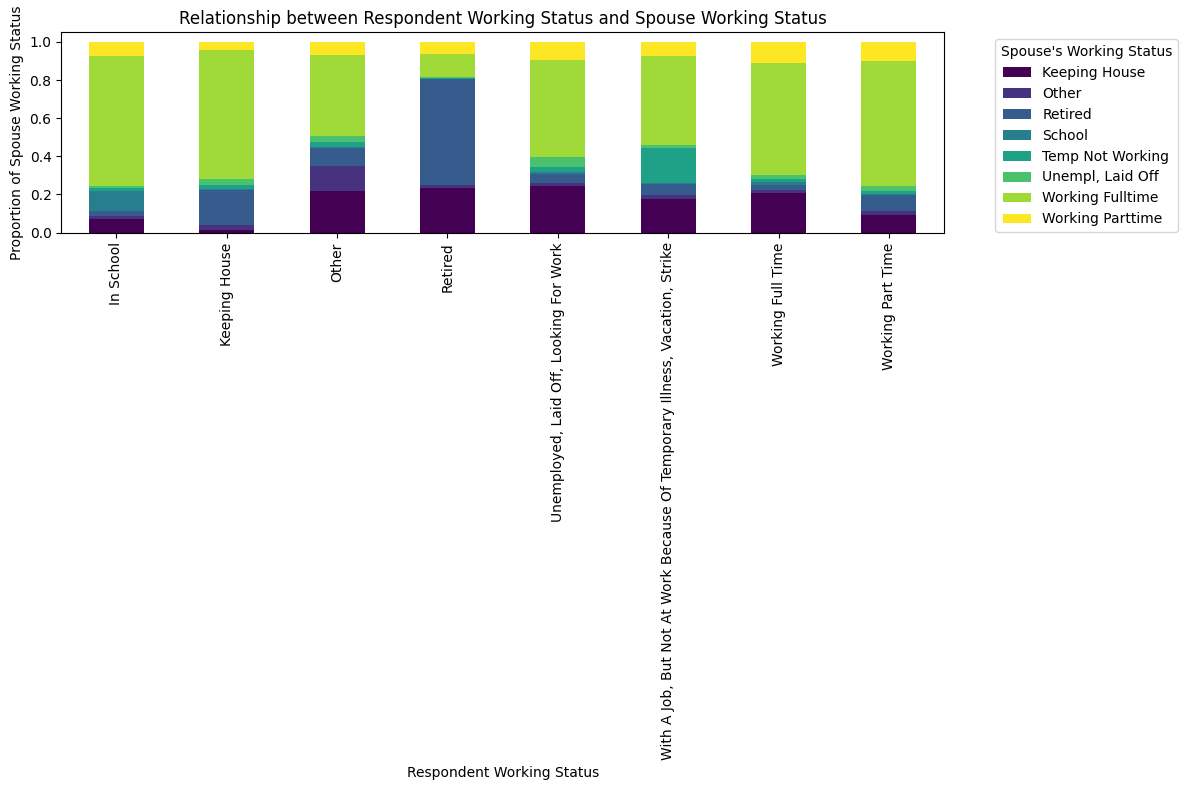

In [12]:
# Cross-tabulate 'wrkstat' and 'spwrksta' to get counts of each combination
wrkstat_spwrksta_counts = pd.crosstab(gss['wrkstat'], gss['spwrksta'])

# Normalize the counts to get proportions for stacking
# We normalize by the sum of each row to see the proportion of spwrksta within each wrkstat level
wrkstat_spwrksta_props = wrkstat_spwrksta_counts.div(wrkstat_spwrksta_counts.sum(axis=1), axis=0)

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
wrkstat_spwrksta_props.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title('Relationship between Respondent Working Status and Spouse Working Status')
plt.xlabel('Respondent Working Status')
plt.ylabel('Proportion of Spouse Working Status')
plt.xticks(rotation=90)
plt.legend(title="Spouse's Working Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [13]:
print(sorted(gss['educ'].dropna().unique()))
print(sorted(gss['speduc'].dropna().unique()))

['1 Year Of College', '10Th Grade', '11Th Grade', '12Th Grade', '1St Grade', '2 Years Of College', '2Nd Grade', '3 Years Of College', '3Rd Grade', '4 Years Of College', '4Th Grade', '5 Years Of College', '5Th Grade', '6 Years Of College', '6Th Grade', '7 Years Of College', '7Th Grade', '8 Or More Years Of College', '8Th Grade', '9Th Grade', 'No Formal Schooling']
['1 Year Of College', '10Th Grade', '11Th Grade', '12Th Grade', '1St Grade', '2 Years Of College', '2Nd Grade', '3 Years Of College', '3Rd Grade', '4 Years Of College', '4Th Grade', '5 Years Of College', '5Th Grade', '6 Years Of College', '6Th Grade', '7 Years Of College', '7Th Grade', '8 Or More Years Of College', '8Th Grade', '9Th Grade', 'No Formal Schooling']


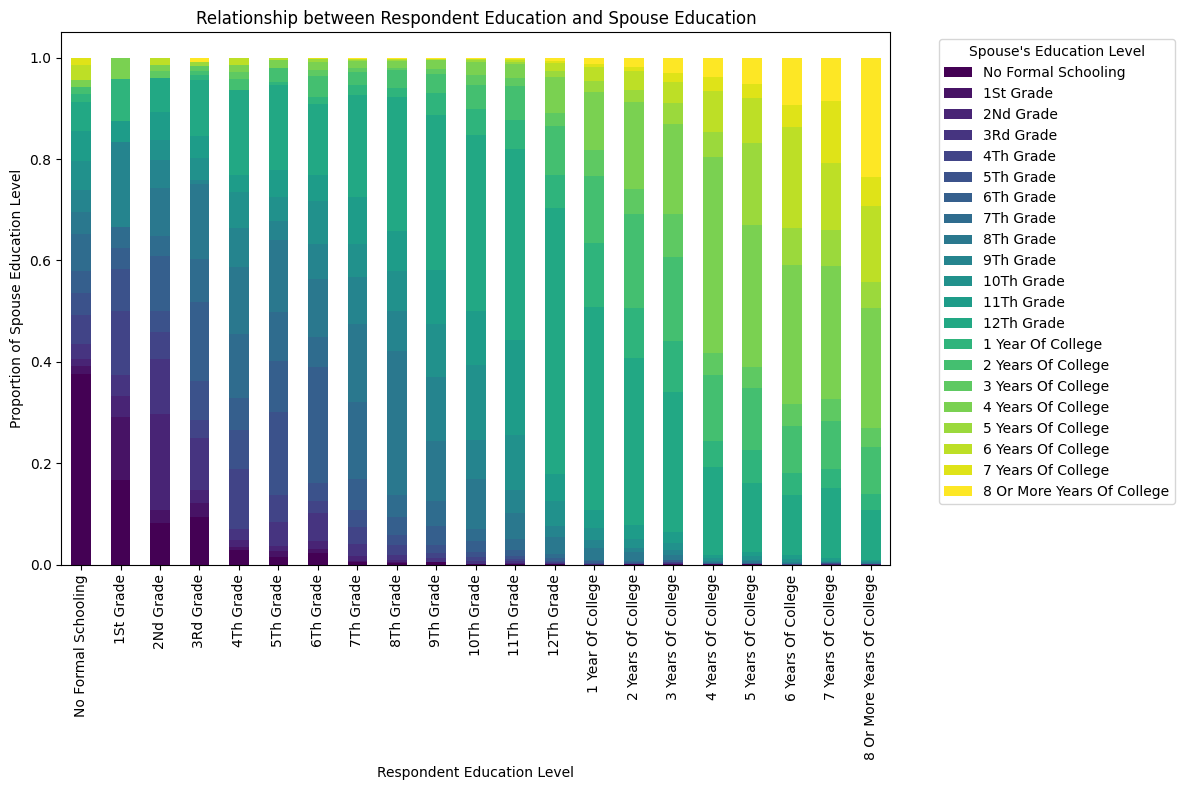

In [14]:
order = [
    "No Formal Schooling",
    "1St Grade","2Nd Grade","3Rd Grade","4Th Grade","5Th Grade","6Th Grade","7Th Grade","8Th Grade","9Th Grade",
    "10Th Grade","11Th Grade","12Th Grade",
    "1 Year Of College","2 Years Of College","3 Years Of College","4 Years Of College",
    "5 Years Of College","6 Years Of College","7 Years Of College","8 Or More Years Of College"
]

present = set(gss['educ'].dropna().unique()) | set(gss['speduc'].dropna().unique())
cats = [c for c in order if c in present]

gss['educ'] = pd.Categorical(gss['educ'], categories=cats, ordered=True)
gss['speduc'] = pd.Categorical(gss['speduc'], categories=cats, ordered=True)

ct = pd.crosstab(gss['educ'], gss['speduc'])
props = ct.div(ct.sum(axis=1), axis=0)

ax = props.plot(kind='bar', stacked=True, figsize=(12,8), colormap='viridis')
ax.set_title('Relationship between Respondent Education and Spouse Education')
ax.set_xlabel('Respondent Education Level')
ax.set_ylabel('Proportion of Spouse Education Level')
plt.xticks(rotation=90)
plt.legend(title="Spouse's Education Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

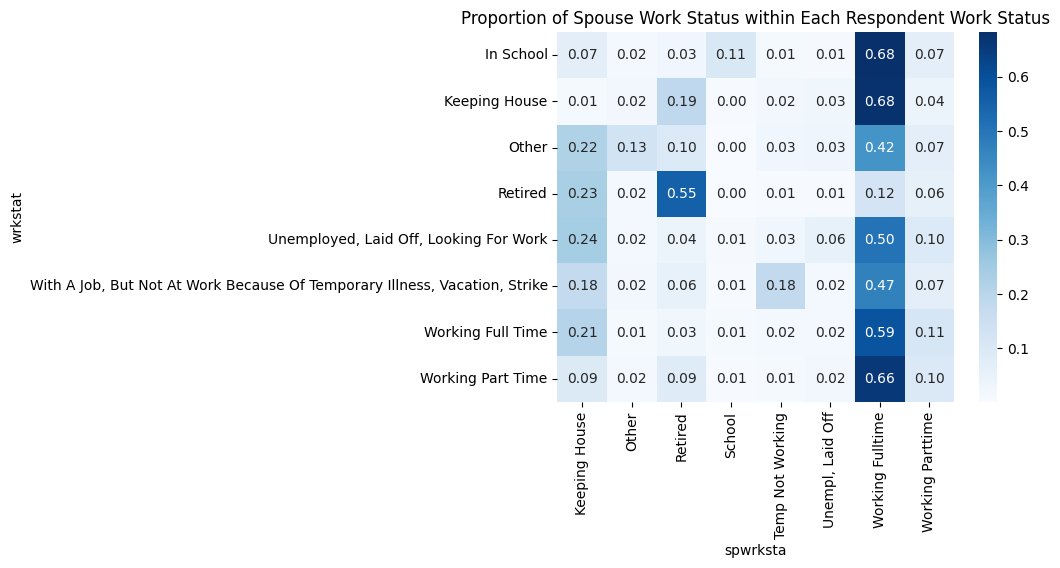

In [33]:
#row-normalized cross-tab (each row sums to 1)
wrkstat_spwrksta_prop = pd.crosstab(gss['wrkstat'], gss['spwrksta'], normalize='index')

sns.heatmap(wrkstat_spwrksta_prop, annot=True, fmt=".2f", cmap="Blues")
plt.title("Proportion of Spouse Work Status within Each Respondent Work Status")
plt.show()

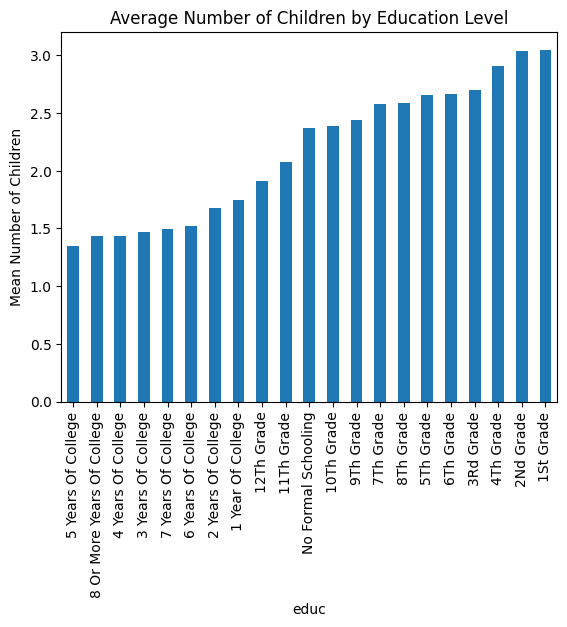

In [35]:
#probability of number of kids by education level
#regressino-esque, atempts to predict whether education level can predict number of children
children_by_educ = gss.groupby('educ')['childs'].mean().sort_values()

children_by_educ.plot(kind='bar')
plt.title("Average Number of Children by Education Level")
plt.ylabel("Mean Number of Children")
plt.xticks(rotation=90)
plt.show()

Question 5

As our objective with this assignment was to examine the theme of family and work dynamics, through the exploration of this dataset, we were able to uncover many interesting insights into how education and employment can impact familial relations. First, it is important to gain a macro-level understanding of the respondent pool, so we looked at marital and employment status for the entirety of the survey respondents. Over half of the survey respondents are employed full-time, and including those working part-time time around 60% of survey respondents can be considered employed, which is very close to the national average, so the dataset is representative in this way. About 54% of survey respondents are married, which is slightly higher than the national average of 47%, but at this scale, this could be considered representative of general trends within the US population.

The next piece of analysis we did was also basic, but it gives good insight into the impact of work status on household makeup. We examined the number of children in relation to employment status, and the data seemed to back up some intuitive assumptions one might have. The vast majority of respondents still in school have 0 children. This makes sense as most are either too young, as school age is considered by many to still be a period of growing up yourself, or too busy with schoolwork to raise a child. This may also be representative of the financial concerns presented by pursuing an education, as those paying for schooling without an active income may not be able to handle the costs of raising a child, deterring them from doing so. For those working full-time, there is a good portion with no kids, which may also be a result of them being too busy to handle the responsibility of raising a child. The majority of other fully employed respondents had between 2-4 children. Many of the other statuses followed similarly, but one that stood out was of those who are keeping the house; very few have no children. This may indicate that children are the sole reason some stay home full-time, as other responsibilities within the home wouldn’t warrant a full-time employment status. People without jobs also have much fewer children across the board, as seen by their skinny plots. This is probably similar to the financial reasons discussed for students. 

These trends were also reflected in the pure averages for the number of children by employment status, which was highest for those whose full-time role is keeping the house. This could indicate that people who can afford to have someone be a stay-at-home parent can also afford to have more children or feel comfortable doing so. People who are retired are a close second, which could be a result of those reaching retirement age having had more time to have kids. 

One of the next trends we wanted to look into was how employment status relates to marital relationships, so to do this, we compared proportions of spouse employment status for each employment type. What was surprising to me at first was how many people who were in school had spouses who were working full-time. Then I realized, those who have spouses and are in school most likely are in some sort of graduate program, as most undergrads in the US are typically not married. As a grad student, it would make sense to have a partner who is either old enough to work full-time or working full-time to help support them. It does follow logically, though, that this status has the highest proportion of spouses who are in school, accounting for those couples that are in school together. Those working full-time have almost entirely either a partner who is also working full-time or who is keeping house. Compared with those working part-time, they have many fewer spouses who are keeping home, as they are unlikely to afford this on a part-time salary, and they have a higher proportion of spouses who work full-time, likely what enables them to work part-time. Those temporarily not working have the largest proportion of spouses who are temporarily not working, which may suggest that conditions that cause this status typically impact entire families, such as a serious illness or injury that requires the partner to stay home or provide frequent care for their spouse. 

Another relationship we thought it would be worthwhile to examine was between the education level of spouses, to see if that, like employment status, impacted who people wanted to have relationships or build families with. One trend that immediately jumped out to me was how quickly the proportion of spouses with under a high school education drops once that person themselves has passed a high school education. Almost no one who has received schooling past high school has a spouse who also did not complete at least the 12th grade. This could be indicative of people meeting their partners at higher education institutions, or socio-economic barriers between those who can afford to go to college and those who cannot, making it difficult for people across those barriers to form relationships. Another interesting piece of analysis from this graph was how large the jump in proportion was for those with spouses with 8+ years of schooling, when they themselves have had 8 years of schooling. This presents the idea that there is a bubble in academia that results in those who are seriously involved getting into relationships with those who are also seriously involved. This makes me wonder what other fields have high rates of intermingling that result in marriages between people with similar involvements or careers. A stark trend in the data is how large a proportion of people with no formal education marry others with no formal education. This seems to be the other end of the spectrum of the trend we just discussed, where socioeconomic barriers are so large for those who cannot receive education that their only option is to also form relationships with others who have no education. 

Overall, the trends discovered through this EDA gave data-based evidence for many assumptions some might consider intuitive, revealed some unexpected trends, as well as gave insight into how career and education are directly impacting the way Americans form relationships and build families.
